In [16]:
# DEVOIR 1 - Codes
# Mesures de similarité avec les cinq algorithmes différents
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyclustering.cluster.kmedoids import kmedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsClassifier
sns.set(rc={'figure.figsize':(12,8)})

In [2]:
# Partition binaire (Algorithme) tirée du TP
def agglomerative_clustering_predict(agglomerative_clustering, dissimilarity_matrix):
    average_dissimilarity = list()
    for i in range(agglomerative_clustering.n_clusters):
        ith_clusters_dissimilarity = dissimilarity_matrix[:, np.where(agglomerative_clustering.labels_==i)[0]]
        average_dissimilarity.append(ith_clusters_dissimilarity.mean(axis=1))
    return np.argmin(np.stack(average_dissimilarity), axis=0)

In [3]:
# Calculer le taux d'erreur d'apprentissage et du test (ou de validation)

# y1: y_train
# y2: y_valid ou y_test
# y_hat1: prédictions de y_train
# y_hat2: prédictions de y_test

def calculate_error(y1, y2, y_hat1, y_hat2):
    error_1 = 0.0
    error_2 = 0.0
    
    for i in range(len(y1)):
        if y1[i] != y_hat1[i]:
            error_1 = error_1 + 1.0
        
    error_1 = (error_1 / len(y1))*100
    
    for i in range(len(y2)):
        if y2[i] != y_hat2[i]:
            error_2 = error_2 + 1.0
    
    error_2 = (error_2 / len(y2))*100
    
    return(error_1, error_2)

def get_accuracy(error):
    return 100.0 - error

In [4]:
# Les mesures de similarité (tirée du TP4)

# Distance euclidienne
def l2(x, y):
    return np.sum(abs(x - y) ** 2) ** (1/2)

# Matrice de dissimilarité
def get_dissimilarity_matrix(dist, X, Y=None):
    Y = X if Y is None else Y
    diss_matrix = np.zeros((X.shape[0], Y.shape[0]))
    
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            diss_matrix[i,j] = dist(X[i], Y[j])
            
        if (i + 1) % 100 == 0:
            print(f'Itération {i + 1} terminée!') 
        if (i + 1) == X.shape[0]:
            print(f'Fin du calcul de la matrice')
            
    return diss_matrix

In [5]:
#########################################################
#######################   MNIST  ########################
#########################################################

# ÉCHANTILLONNAGE DES DONNÉES MNIST

# MNIST_TRAIN: contient 60 000 données
# Échantillon de 6000 premières données de mnist_train pour données d'APPRENTISSAGE
n_train = 6000
mnist_train = pd.read_csv('mnist_train.csv')
mnist_train = mnist_train.head(n_train)
#print(mnist_train.shape)

#n_valid = 2000
# Échantillon de 2000 dernières données de mnist_train pour données de VALIDATION
#mnist_valid = pd.read_csv('mnist_train.csv')
#mnist_valid = mnist_valid.head(-(60000 - n_valid))
#print(mnist_valid.shape)

# MNIST_TEST: contient 10 000 données
# Échantillon de 2000 premières données de mnist_test pour données de TEST
n_test = 2000
mnist_test = pd.read_csv('mnist_test.csv')
mnist_test = mnist_test.head(n_test)
#print(mnist_test.shape)

# Trier les données selon l'ordre des chiffres 0 à 9 (pour faciliter la visualisation 
# de la dissimilarité entre les images)
mnist_train = mnist_train.sort_values(by=['label'])
mnist_valid = mnist_valid.sort_values(by=['label'])
mnist_test = mnist_test.sort_values(by=['label'])

# Séparer les datasets x et y
x_train = mnist_train.drop('label', axis = 1).values
y_train = mnist_train.loc[:, 'label'].values

#x_valid = mnist_valid.drop('label', axis = 1).values
#y_valid = mnist_valid.loc[:, 'label'].values

x_test = mnist_test.drop('label', axis = 1).values
y_test = mnist_test.loc[:, 'label'].values

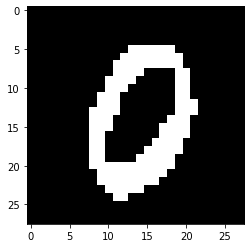

In [6]:
# NETTOYAGE DES DONNÉES (convertir les pixels de 0 à 255, à avoir uniquement
# des chiffres binaires (0 ou 1))

for i in range(len(x_train)):
    for j in range(len(x_train[0])):
        if x_train[i][j] != 0:
            x_train[i][j] = round(int(x_train[i][j])/255.0)

for i in range(len(x_test)):
    for j in range(len(x_test[0])):
        #if x_valid[i][j] != 0:
        #    x_valid[i][j] = round(int(x_valid[i][j])/255.0)
        if x_test[i][j] != 0:
            x_test[i][j] = round(int(x_test[i][j])/255.0)
            
image = x_train[0]
matrix_image = np.reshape(image, (28,28))
plt.imshow(matrix_image, cmap='gray')
plt.show()

In [25]:
# Majorité de y_test:
for i in range(0,10):
    print(f'Nombre d\'occurences du chiffre {i}: {np.count_nonzero(y_test == i)}')
    
# Chiffre majoritaire: 1
y_train_majority = np.ones(len(y_train))
y_test_majority = np.ones(len(y_test))
errors = calculate_error(y_train, y_test, y_train_majority, y_test_majority)
print(f'Erreur de majorité sur y_test: {errors[1]}%')

Nombre d'occurences du chiffre 0: 175
Nombre d'occurences du chiffre 1: 234
Nombre d'occurences du chiffre 2: 219
Nombre d'occurences du chiffre 3: 207
Nombre d'occurences du chiffre 4: 217
Nombre d'occurences du chiffre 5: 179
Nombre d'occurences du chiffre 6: 178
Nombre d'occurences du chiffre 7: 205
Nombre d'occurences du chiffre 8: 192
Nombre d'occurences du chiffre 9: 194
Erreur de majorité sur y_test: 88.3%


In [7]:
# MATRICE DE DISSIMILARITÉ EUCLIDIENNE (Apprentissage) 6 000 par 6 000
mnist_dissimilarity_train = get_dissimilarity_matrix(l2, x_train)
print(mnist_dissimilarity_train.shape)

Itération 100 terminée!
Itération 200 terminée!
Itération 300 terminée!
Itération 400 terminée!
Itération 500 terminée!
Itération 600 terminée!
Itération 700 terminée!
Itération 800 terminée!
Itération 900 terminée!
Itération 1000 terminée!
Itération 1100 terminée!
Itération 1200 terminée!
Itération 1300 terminée!
Itération 1400 terminée!
Itération 1500 terminée!
Itération 1600 terminée!
Itération 1700 terminée!
Itération 1800 terminée!
Itération 1900 terminée!
Itération 2000 terminée!
Itération 2100 terminée!
Itération 2200 terminée!
Itération 2300 terminée!
Itération 2400 terminée!
Itération 2500 terminée!
Itération 2600 terminée!
Itération 2700 terminée!
Itération 2800 terminée!
Itération 2900 terminée!
Itération 3000 terminée!
Itération 3100 terminée!
Itération 3200 terminée!
Itération 3300 terminée!
Itération 3400 terminée!
Itération 3500 terminée!
Itération 3600 terminée!
Itération 3700 terminée!
Itération 3800 terminée!
Itération 3900 terminée!
Itération 4000 terminée!
Itération

In [9]:
# MATRICE DE DISSIMILARITÉ EUCLIDIENNE (Test) 2 000 par 6 000
mnist_dissimilarity_test = get_dissimilarity_matrix(l2, x_test, x_train)
print(mnist_dissimilarity_test.shape)

Itération 100 terminée!
Itération 200 terminée!
Itération 300 terminée!
Itération 400 terminée!
Itération 500 terminée!
Itération 600 terminée!
Itération 700 terminée!
Itération 800 terminée!
Itération 900 terminée!
Itération 1000 terminée!
Itération 1100 terminée!
Itération 1200 terminée!
Itération 1300 terminée!
Itération 1400 terminée!
Itération 1500 terminée!
Itération 1600 terminée!
Itération 1700 terminée!
Itération 1800 terminée!
Itération 1900 terminée!
Itération 2000 terminée!
Fin du calcul de la matrice
(2000, 6000)


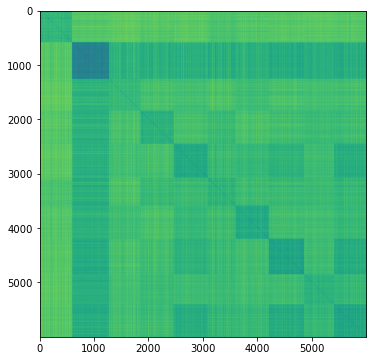

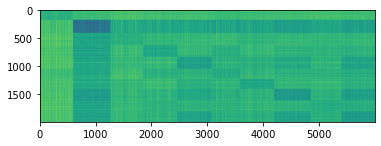

In [10]:
# VISUALISATION DES MATRICES DE DISSIMILARITÉ
plt.figure(figsize=(6,6)).add_subplot(111).imshow(mnist_dissimilarity_train);
#plt.figure(figsize=(6,6)).add_subplot(111).imshow(mnist_dissimilarity_valid);
plt.figure(figsize=(6,6)).add_subplot(111).imshow(mnist_dissimilarity_test);

In [11]:
# K-Médoïdes
initial_medoids = [0,1,2,3,4,5,6,7,8,9]
kmedoids_instance = kmedoids(mnist_dissimilarity_train, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()

kmedoids_train = kmedoids_instance.predict(mnist_dissimilarity_train)
kmedoids_test = kmedoids_instance.predict(mnist_dissimilarity_test)

In [15]:
kmedoids_errors = calculate_error(y_train, y_test, kmedoids_train, kmedoids_test)
print(f'Erreur d\'entraînement: {kmedoids_errors[0]}%')
print(f'Erreur de test: {kmedoids_errors[1]}%')

Erreur d'entraînement: 85.86666666666667%
Erreur de test: 85.45%


In [188]:
# Partition binaire
agglomerative_clustering = AgglomerativeClustering(n_clusters=10, affinity='precomputed', linkage='average')
agglomerative_clustering.fit(mnist_dissimilarity_train)

# Prédictions des labels y_train et y_test
agglo_train = agglomerative_clustering_predict(agglomerative_clustering, mnist_dissimilarity_train)
agglo_test = agglomerative_clustering_predict(agglomerative_clustering, mnist_dissimilarity_test)

agglo_errors = calculate_error(y_train, y_test, agglo_train, agglo_test)
print(f'Erreur d\'entraînement: {agglo_errors[0]}%')
print(f'Erreur de test: {agglo_errors[1]}%')

Erreur d'entraînement: 85.0%
Erreur de test: 85.45%


array([3, 3, 3, ..., 1, 1, 8], dtype=int64)

In [165]:
# PCoA
components = np.array([2, 3, 5, 10, 20, 50, 100, 200, 300])
error_test = np.zeros(len(components))

for i in range(len(components)):
    pcoa = KernelPCA(n_components = components[i], kernel='precomputed')
    pcoa_train = pcoa.fit_transform(-.5*mnist_dissimilarity_train**2)
    pcoa_test = pcoa.transform(-.5*mnist_dissimilarity_test**2)

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(pcoa_train, y_train)
    
    knn_train = knn.predict(pcoa_train)
    knn_test = knn.predict(pcoa_test)

    knn_errors = calculate_error(y_train, y_test, knn_train, knn_test)
    
    error_test[i] = knn_errors[1]

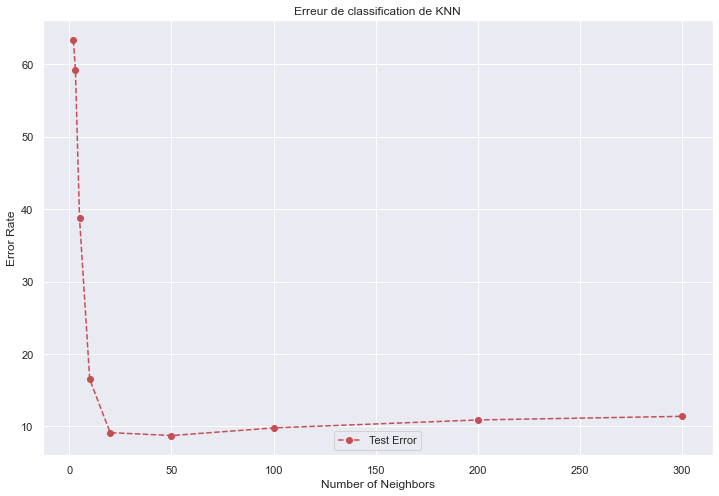

Erreur d'entraînement: 0.0%
Erreur de test: 8.75%


In [168]:
plt.plot(components, error_test, linestyle='--', marker='o', color='r', label = "Test Error")
plt.legend(frameon=True, loc='lower center', ncol=1)
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')
plt.title('Erreur de classification de KNN et PCoA')
plt.grid(True)
plt.show()

# Choix optimal: dimension 50
pcoa = KernelPCA(n_components = 50, kernel='precomputed')
pcoa_train = pcoa.fit_transform(-.5*mnist_dissimilarity_train**2)
pcoa_test = pcoa.transform(-.5*mnist_dissimilarity_test**2)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(pcoa_train, y_train)
    
knn_train = knn.predict(pcoa_train)
knn_test = knn.predict(pcoa_test)

knn_errors = calculate_error(y_train, y_test, knn_train, knn_test)
print(f'Erreur d\'entraînement: {knn_errors[0]}%')
print(f'Erreur de test: {knn_errors[1]}%')

In [182]:
# Isomap
components = np.array([2, 3, 5, 10, 20, 50, 100])
error_test = np.zeros(len(components))

for i in range(len(components)):
    isomap = Isomap(n_components=components[i], n_neighbors=2, metric='precomputed')
    isomap_train = isomap.fit_transform(mnist_dissimilarity_train)
    isomap_test = isomap.transform(mnist_dissimilarity_test)

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(isomap_train, y_train)
    
    knn_train = knn.predict(isomap_train)
    knn_test = knn.predict(isomap_test)

    knn_errors = calculate_error(y_train, y_test, knn_train, knn_test)
    
    error_test[i] = knn_errors[1]

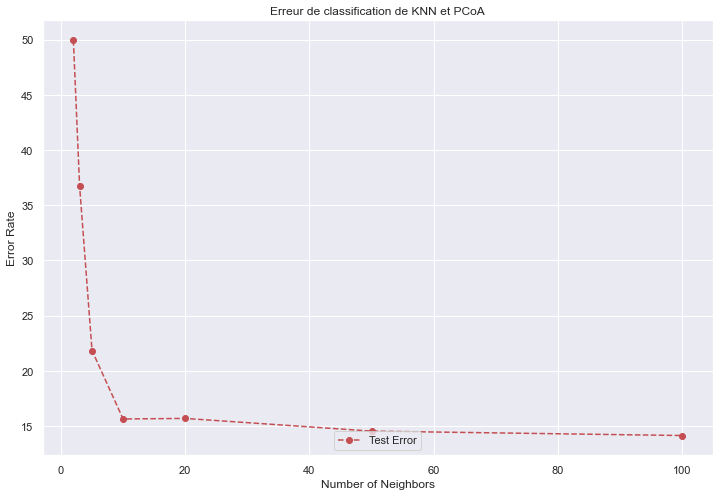

Erreur d'entraînement: 0.0%
Erreur de test: 14.549999999999999%


In [183]:
plt.plot(components, error_test, linestyle='--', marker='o', color='r', label = "Test Error")
plt.legend(frameon=True, loc='lower center', ncol=1)
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')
plt.title('Erreur de classification de KNN et Isomap')
plt.grid(True)
plt.show()

# Pas trop de différences plus tard, donc on prendra la même dimension que PCoA qui est 50.
isomap = Isomap(n_components=50, n_neighbors=2, metric='precomputed')
isomap_train = isomap.fit_transform(mnist_dissimilarity_train)
isomap_test = isomap.transform(mnist_dissimilarity_test)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(isomap_train, y_train)
    
knn_train = knn.predict(isomap_train)
knn_test = knn.predict(isomap_test)

knn_errors = calculate_error(y_train, y_test, knn_train, knn_test)
print(f'Erreur d\'entraînement: {knn_errors[0]}%')
print(f'Erreur de test: {knn_errors[1]}%')

In [179]:
# KNN
voisins = np.array([1, 2, 5, 10, 20, 50, 100])
error_train = np.zeros(len(voisins))
error_test = np.zeros(len(voisins))

for i in range(len(voisins)):
    knn = KNeighborsClassifier(n_neighbors=voisins[i], metric='precomputed', algorithm='brute')
    knn.fit(mnist_dissimilarity_train, y_train)
    knn_train = knn.predict(mnist_dissimilarity_train)
    knn_test = knn.predict(mnist_dissimilarity_test)
    
    errors = calculate_error(y_train, y_test, knn_train, knn_test)
    
    error_train[i] = errors[0]
    error_test[i] = errors[1]

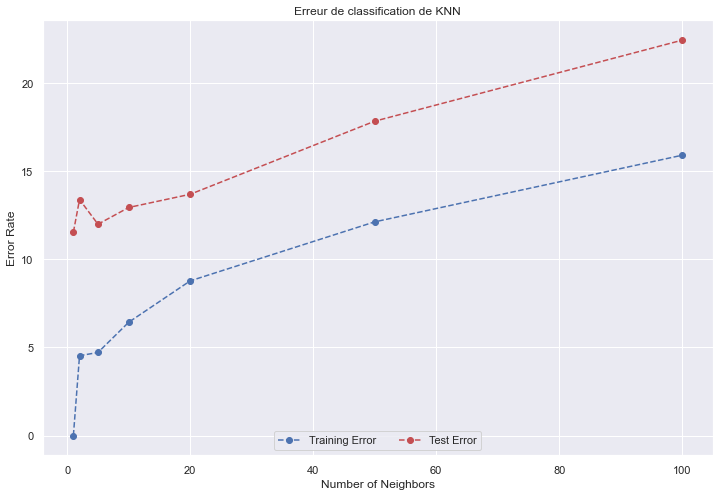

In [180]:
plt.plot(voisins, error_train, linestyle='--', marker='o', color='b', label = "Training Error")
plt.plot(voisins, error_test, linestyle='--', marker='o', color='r', label = "Test Error")
plt.legend(frameon=True, loc='lower center', ncol=2)
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')
plt.title('Erreur de classification de KNN')
plt.grid(True)
plt.show()

# On choisir le nombre de voisins = 1 donnent une erreur de test optimale.

In [181]:
knn = KNeighborsClassifier(n_neighbors=1, metric='precomputed', algorithm='brute')

knn.fit(mnist_dissimilarity_train, y_train)

knn_train = knn.predict(mnist_dissimilarity_train)
knn_test = knn.predict(mnist_dissimilarity_test)

knn_errors = calculate_error(y_train, y_test, knn_train, knn_test)
    
print(f'Erreur d\'entraînement: {knn_errors[0]}%')
print(f'Erreur de test: {knn_errors[1]}%')

Erreur d'entraînement: 0.0%
Erreur de test: 11.55%


In [115]:
'''
RÉSULTATS D'ERREURS POUR MNIST_TEST:
ERREUR DE MAJORITÉ: 88.3%

NOTRE NOTION DE SIMILARITÉ:
- Kmédoïdes:
- Partition Binaire:
- PCoA:
- Isomap:
- k-NN:

DISTANCE EUCLIDIENNE:
- Kmédoïdes: 85.45% très inefficace!!
- Partition Binaire: 85.45% très inefficace!!
- PCoA (dimension 50): 8.75%
- Isomap (dimension 50): 14.5%
- k-NN (1 voisin): 11.55%


Pour ADULT, on compare avec accuracy de 81% trouvée par KNN trouvée en Démo 2 (19% d'erreur).
'''



In [ ]:
# Anciens codes non utilisés pour l'instant

# Graphique des PCoA à 2 dimensions

#sns.set(rc={'figure.figsize':(12,8)})
#graph_train = sns.scatterplot(x = pcoa_train[:,0], y = pcoa_train[:, 1], hue = y_train, 
#                        palette = ['red', 'orange', 'gold', 'green', 'blue', 'purple', 'pink', 'brown', 'grey', 'black'])

#sns.set(rc={'figure.figsize':(12,8)})
#graph_test = sns.scatterplot(x = pcoa_test[:,0], y = pcoa_test[:, 1], hue = y_test, 
#                        palette = ['red', 'orange', 'gold', 'green', 'blue', 'purple', 'pink', 'brown', 'grey', 'black'])

# Isomap
#isomap = Isomap(n_components=2, n_neighbors=2, metric='precomputed')
#isomap_train = isomap.fit_transform(mnist_dissimilarity_train)
#isomap_test = isomap.transform(mnist_dissimilarity_test)

#import seaborn as sns
#sns.set(rc={'figure.figsize':(12,8)})
#graph_train = sns.scatterplot(x = isomap_train[:,0], y = isomap_train[:,1], hue = y_train, 
#                        palette = ['red', 'orange', 'gold', 'green', 'blue', 'purple', 'pink', 'brown', 'grey', 'black'])

#graph_test = sns.scatterplot(x = isomap_test[:,0], y = isomap_test[:,1], hue = y_test, 
#                        palette = ['red', 'orange', 'gold', 'green', 'blue', 'purple', 'pink', 'brown', 'grey', 'black'])